# A unit test notebook for the Shash class in shash_tfp.py

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
import tensorflow as tf

from shash_tfp import Shash

__author__ = "Randal J. Barnes and Elizabeth A. Barnes"
__date__ = "11 June 2022"

# Verify our understanding of the tfp formulation.

We compute and plot the pdf defined by Tensorflow (i.e. using the tfp parameters and formulation) over a broad range. Then we compute and plot the pdf defined by Jones and Pewsey after converting the tfp parameters to the Jones and Pewsey parameters.  The two plots should be indistinguishable.

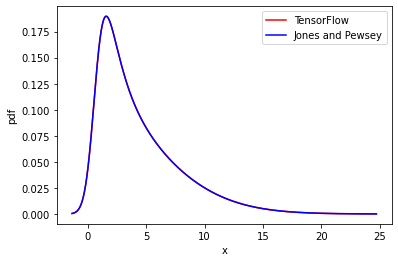

In [2]:
TWO_PI = 6.2831853071795864769252868

loc = 1.0
scale = 2.0
skewness = 1.0
tailweight = 1.1

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.0001)
ub = dist.quantile(0.9999)
x = tf.cast(tf.linspace(lb, ub, 10000), dtype=tf.float32)

f = dist.prob(x)

xi, eta, epsilon, delta = dist._convert_tfp_to_jones_and_pewsey()

y = (x - xi) / eta
Ssqr = tf.math.square(tf.math.sinh(delta * tf.math.asinh(y) - epsilon))
ff = (
    delta
    / eta
    * tf.math.sqrt((1.0 + Ssqr) / (TWO_PI * (1.0 + tf.math.square(y))))
    * tf.math.exp(-Ssqr / 2.0)
)

plt.plot(x, f, "-r", x, ff, "-b")
plt.xlabel("x")
plt.ylabel("pdf")
plt.legend(["TensorFlow", "Jones and Pewsey"])

# Test Shash.mean

TensorFlow does not implement the mean method. The mean method is implemented by the Shash subclass.  We test the mean method by comparing the analytic values to values computed using numerical integration. We do not expect numerical integration to yield the analytic values, but they should be close.

We consider the shash4, shash3, and shash2 cases separately.

## CASE: shash4

shash4: max mean |error| = 0.000733


Text(0, 0.5, '|error|')

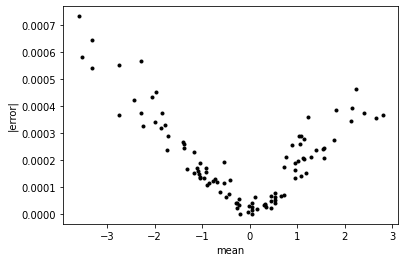

In [3]:
NTEST = 100
NN = 10000

# CASE: Shash4
loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=0.5, maxval=1.5)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash4: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(mean_analytic, tf.math.abs(error), ".k")
plt.xlabel("mean")
plt.ylabel("|error|")

## CASE: shash3

shash3: max mean |error| = 0.000493


Text(0, 0.5, '|error|')

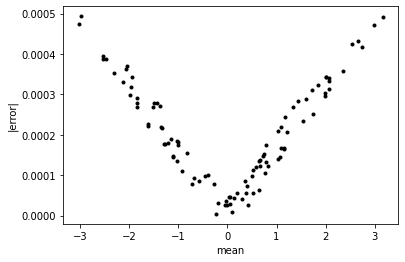

In [4]:
NTEST = 100
NN = 10000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)

dist = Shash(loc=loc, scale=scale, skewness=skewness)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash3: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(mean_analytic, tf.math.abs(error), ".k")
plt.xlabel("mean")
plt.ylabel("|error|")

## CASE: shash2

shash2: max mean |error| = 0.000120


Text(0, 0.5, '|error|')

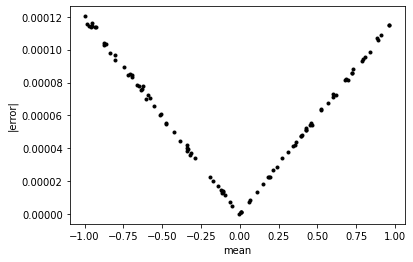

In [5]:
NTEST = 100
NN = 10000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash2: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(mean_analytic, tf.math.abs(error), ".k")
plt.xlabel("mean")
plt.ylabel("|error|")

# Test Shash.median

TensorFlow does not implement the mean function. The mean function is implemented by the Shash subclass.  We test the mean function by comparing the analytic values to 50 percentiles returned by the quantile method.

max median |error| = 0.000000


Text(0, 0.5, '|error|')

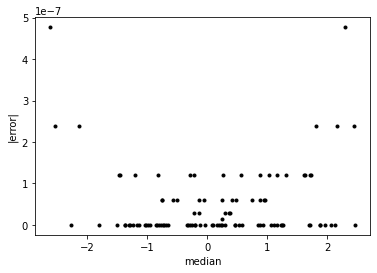

In [6]:
NTEST = 100

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=0.5, maxval=1.5)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

median_quantile = dist.quantile(0.5)
median_analytic = dist.median()

error = median_analytic - median_quantile
print(f"max median |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(median_analytic, tf.math.abs(error), ".k")
plt.xlabel("median")
plt.ylabel("|error|")

# Test Shash.variance

TensorFlow does not implement the variance method. The variance method is implemented by the Shash subclass.  We test the variance method by comparing the analytic values to values computed using numerical integration. We do not expect numerical integration to yield the analytic values, but they should be close.

max variance |error| = 0.012130


Text(0, 0.5, '|error|')

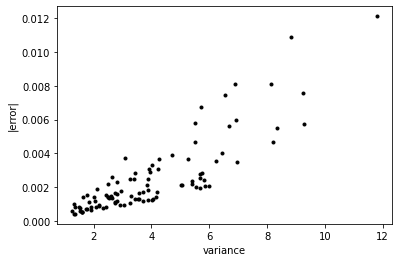

In [7]:
NTEST = 100
NN = 10000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=0.5, maxval=1.5)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)

mu = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
variance_numeric = tf.reduce_mean(tf.math.square(xx - mu) * ff, axis=0) * (ub - lb)
variance_analytic = dist.variance()

error = variance_analytic - variance_numeric
print(f"max variance |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(variance_analytic, tf.math.abs(error), ".k")
plt.xlabel("variance")
plt.ylabel("|error|")

# Test Shash.stddev

TensorFlow does not implement the stddev method. The stddev method is implemented by the Shash subclass.  We test the stddev method by comparing the analytic values to values computed using numerical integration. We do not expect numerical integration to yield the analytic values, but they should be close.

max stddev |error| = 0.002342


Text(0, 0.5, '|error|')

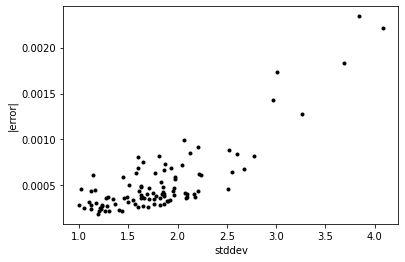

In [8]:
NTEST = 100
NN = 10000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=0.5, maxval=1.5)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)

mu = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
stddev_numeric = tf.math.sqrt(tf.reduce_mean(tf.math.square(xx - mu) * ff, axis=0) * (ub - lb))
stddev_analytic = tf.math.sqrt(dist.variance())

error = stddev_analytic - stddev_numeric
print(f"max stddev |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(stddev_analytic, tf.math.abs(error), ".k")
plt.xlabel("stddev")
plt.ylabel("|error|")

# Test Shash.skewness

TensorFlow does not implement the skewness method. The skewness method is implemented by the Shash subclass.  We test the skewness method by comparing the analytic values to values computed using numerical integration. We do not expect numerical integration to yield the analytic values, but they should be close.

max skewness |error| = 0.007325


Text(0, 0.5, '|error|')

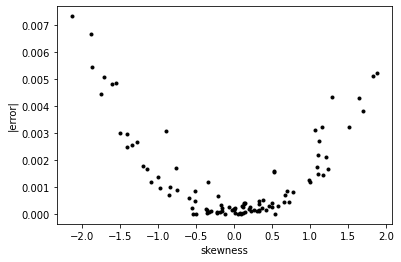

In [9]:
NTEST = 100
NN = 10000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=0.5, maxval=1.5)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)

mu = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
sigma = tf.math.sqrt(tf.reduce_mean(tf.math.square(xx - mu) * ff, axis=0) * (ub - lb))
skewness_numeric = (
    tf.reduce_mean(tf.math.square(xx - mu) * (xx - mu) * ff, axis=0) * (ub - lb)
) / (sigma * sigma * sigma)
skewness_analytic = dist.skew()

error = skewness_analytic - skewness_numeric
print(f"max skewness |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

plt.plot(skewness_analytic, tf.math.abs(error), ".k")
plt.xlabel("skewness")
plt.ylabel("|error|")

# Time the various methods.

In [ ]:
NTEST = 100

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

%timeit dist.mean()
%timeit dist.median()
%timeit dist.skew()
%timeit dist.stddev()
%timeit dist.variance()

116 ms ± 805 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
216 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
